### calculate divergences between data sets

In [1]:
from numpy.random import rand, randn
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats, spatial

from fastdtw import fastdtw

from numpy import arange, zeros, ones
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# load lte library
import ite
from ite.cost.x_factory import co_factory
from ite.cost.x_analytical_values import analytical_value_d_l2
from ite.cost.x_analytical_values import analytical_value_d_mmd


In [2]:
# Rank Correlation of SVCCA mean model correlation (net similarity) and Transferability (Transfer Performance increase)
def rank_pearson_corr(a, b):
    # spearman roh rank-correlation
    spearman_corr, spearman_pvalue = stats.spearmanr(a, b)
    print("Spearman Correlation:", spearman_corr)
    print("Spearman p_value:", spearman_pvalue)
    print("")
    # kendall tau rank-correlation
    kendall_tau, kendall_p_value = stats.kendalltau(a, b)
    print("Kendall Correlation:", kendall_tau)
    print("Kendall p_value:", kendall_p_value)
    print("")
    # pearson linear correlation for comparison
    pearson_corr, pearson_pvalue = stats.pearsonr(a, b)
    print("Pearson Correlation:", pearson_corr)
    print("Pearson p_value:", pearson_pvalue)

In [3]:
# set paths data sets
data_sets = ["data/preprocessed/branch1.pkl",
              "data/preprocessed/branch2.pkl",
              "data/preprocessed/branch3.pkl",
              "data/preprocessed/branch4.pkl",
              "data/preprocessed/branch5.pkl",
              "data/preprocessed/branch6.pkl"]

distances = []
# start off so array is multiple of 7
start = '2014-01-05'

# load data and reshape it
branches = [np.reshape(pd.read_pickle(data_sets[0]).loc[start:].values, (-1, 7)),
np.reshape(pd.read_pickle(data_sets[1]).loc[start:].values, (-1, 7)),
np.reshape(pd.read_pickle(data_sets[2]).loc[start:].values, (-1, 7)),
np.reshape(pd.read_pickle(data_sets[3]).loc[start:].values, (-1, 7)),
np.reshape(pd.read_pickle(data_sets[4]).loc[start:].values, (-1, 7)),
np.reshape(pd.read_pickle(data_sets[5]).loc[start:].values, (-1, 7))]

FileNotFoundError: [Errno 2] No such file or directory: '../data/preprocessed/branch1.pkl'

Visualization of transferability results:


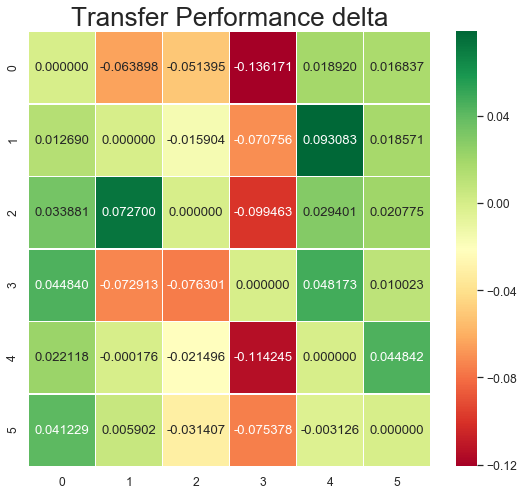

In [121]:
# get transferability values
# transferability values / transfer performance increase in %

transferability_old = [
    [0,-0.0026408,0.0053692,-0.0118591,0.1293025,0.0212494],
    [0.0657007,0,-0.0159039,-0.0119574,0.1552900,0.0607466],
    [0.0504179,0.0727003,0,-0.0820202,0.0724330,0.0207745],
    [0.0448396,0.0131069,-0.0678191,0,0.0717826,0.0415678],
    [0.0517473,0.0129677,-0.0214962,-0.0590644,0,0.0530523],
    [0.0448200,0.0059016,-0.0314071,-0.0415958,0.2059353,0]
]

# fixed frozen layers 
transferability = [
    [0,-0.0638979,-0.0513953,-0.1361713, 0.0189200, 0.0168374],
    [0.0126902, 0,-0.0159039,-0.0707560, 0.0930829, 0.0185711],
    [0.0338808, 0.0727003, 0,-0.0994628, 0.0294007, 0.0207745],
    [0.0448396,-0.0729125,-0.0763015, 0, 0.0481729, 0.0100228],
    [0.0221180,-0.0001760,-0.0214962,-0.1142455, 0, 0.0448424],
    [0.0412290, 0.0059016,-0.0314071,-0.0753782,-0.0031263, 0]
]


print('Visualization of transferability results:')

sns.set(font_scale=1.1)

f, ax = plt.subplots(figsize=(9, 8))
ax.set_title('Transfer Performance delta', fontsize=26)
sns.heatmap(transferability, annot=True, fmt="f", linewidths=.5, ax=ax,robust=True, cmap='RdYlGn')
plt.show()

## calculate distances

In [122]:
# define similarities
co = [[ite.cost.BDKL_KnnK(), 'BDKL_KNNK'],
     [ite.cost.BDBhattacharyya_KnnK(), 'BDBhattacharyya_KnnK'],
     [ite.cost.x_factory.co_factory('BDKL_KnnK',mult=True), 'Co-factory BDKL_KnnK'],
     [ite.cost.x_factory.co_factory('BDKL_KnnKiTi',mult=True), 'Co-factory BDKL_KnnKiTi'],
     [ite.cost.x_factory.co_factory('MDKL_HSCE',mult=True), 'Co-factory BDKL_KnnKiTi']]
dim = 7 # y
t1, t2 = 208, 208 # number of samples from y

distances = []
for estimator in co:
    distance = []
    for b1 in branches:
        distance_branch = []
        for b2 in branches:
            distance_branch.append(estimator[0].estimation(b1, b2))
            # calculate distances
        distance.append(distance_branch)
    distances.append([distance, estimator[1]])
    


In [123]:
# start of with dtw distances

distance = []
for b1 in branches:
    distance_branch = []
    b1 = normalize(b1, norm='max', axis=0)
    for b2 in branches:
        b2 = normalize(b2, norm='max', axis=0)
        dtw_dist, path = fastdtw(b1, b2, dist=spatial.distance.euclidean)
        distance_branch.append(dtw_dist)
        # calculate distances
    distance.append(distance_branch)
distances.append([distance, 'DTW euclidean'])


## visualize distances and calculate correlations

-----------
BDKL_KNNK


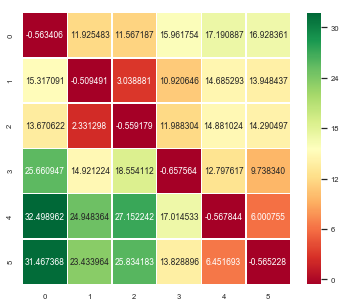

Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches

Spearman Correlation: -0.03225806451612903
Spearman p_value: 0.8656229259026104

Kendall Correlation: -0.03908045977011494
Kendall p_value: 0.7772097145495377

Pearson Correlation: 0.03186578889901577
Pearson p_value: 0.8672425968922959
-----------
BDBhattacharyya_KnnK


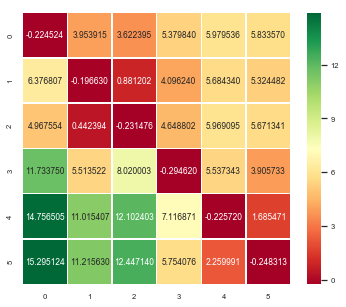

Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches

Spearman Correlation: 0.033592880978865404
Spearman p_value: 0.8601156210111618

Kendall Correlation: -0.006896551724137931
Kendall p_value: 0.9717917196756791

Pearson Correlation: 0.06993170364982566
Pearson p_value: 0.7134652259302438
-----------
Co-factory BDKL_KnnK


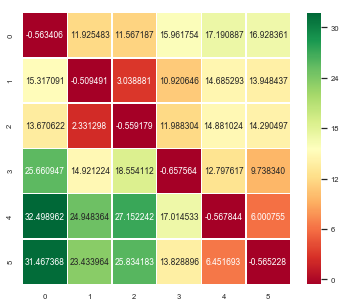

Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches

Spearman Correlation: -0.03225806451612903
Spearman p_value: 0.8656229259026104

Kendall Correlation: -0.03908045977011494
Kendall p_value: 0.7772097145495377

Pearson Correlation: 0.03186578889901577
Pearson p_value: 0.8672425968922959
-----------
Co-factory BDKL_KnnKiTi


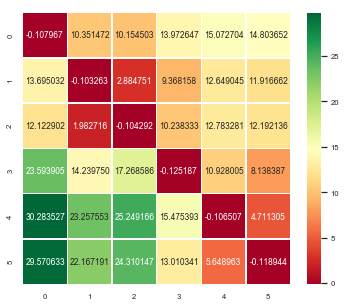

Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches

Spearman Correlation: -0.07096774193548387
Spearman p_value: 0.7094014786435507

Kendall Correlation: -0.05287356321839081
Kendall p_value: 0.6971651256176505

Pearson Correlation: 0.020097136406981183
Pearson p_value: 0.9160507570341111
-----------
Co-factory BDKL_KnnKiTi


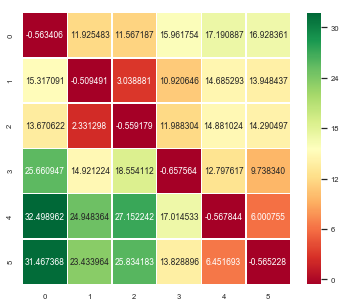

Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches

Spearman Correlation: -0.03225806451612903
Spearman p_value: 0.8656229259026104

Kendall Correlation: -0.03908045977011494
Kendall p_value: 0.7772097145495377

Pearson Correlation: 0.031865788899015535
Pearson p_value: 0.8672425968922959
-----------
DTW euclidean


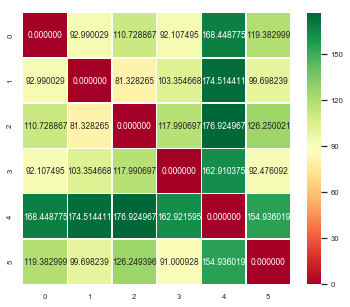

Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches

Spearman Correlation: 0.22232142826136053
Spearman p_value: 0.23767763144011894

Kendall Correlation: 0.1608548939078514
Kendall p_value: 0.21743069059527775

Pearson Correlation: 0.24640379236887927
Pearson p_value: 0.18931479109052832


In [124]:
# define indices w/o diagonal values
relevant_indices = [1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34]

# transform transferability for processing
transferability = pd.DataFrame(transferability)



# Transferability data frame
transfer_array = np.ravel(transferability.values)
 
sns.set(font_scale=0.7)

for distance in distances:
    print('-----------')
    print(distance[1])
    f, ax = plt.subplots(figsize=(6, 5))
    # ax.set_title('euklidean distance', fontsize=26)
    sns.heatmap(distance[0], annot=True, fmt="f", linewidths=.5, ax=ax,robust=True, cmap='RdYlGn')
    plt.show()
    
    print('Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches')
    print("")

    # transform to df
    distance = pd.DataFrame(distance[0])
    # flatten 
    data_sim_array = np.ravel(distance.values)
    # calculate corr
    rank_pearson_corr(transfer_array[relevant_indices], data_sim_array[relevant_indices])




# T-SNE
## Calculate T-SNE for data sets

In [125]:
tsne_results = []
for branch in branches:
    tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=1000)
    tsne_results.append(tsne.fit_transform(pd.DataFrame(branch).values))

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 208 samples in 0.000s...
[t-SNE] Computed neighbors for 208 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 208 / 208
[t-SNE] Mean sigma: 1383.463408
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.192154
[t-SNE] KL divergence after 1000 iterations: 0.567335
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 208 samples in 0.000s...
[t-SNE] Computed neighbors for 208 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 208 / 208
[t-SNE] Mean sigma: 786.118630
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.110832
[t-SNE] KL divergence after 1000 iterations: 0.641978
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 208 samples in 0.000s...
[t-SNE] Computed neighbors for 208 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 208 / 208
[t-SNE] Mean sigma: 415.654153
[t-SNE] KL divergence after 250 i

## Plot T-SNE for data sets

/Users/robinhirt/anaconda3/envs/tl/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


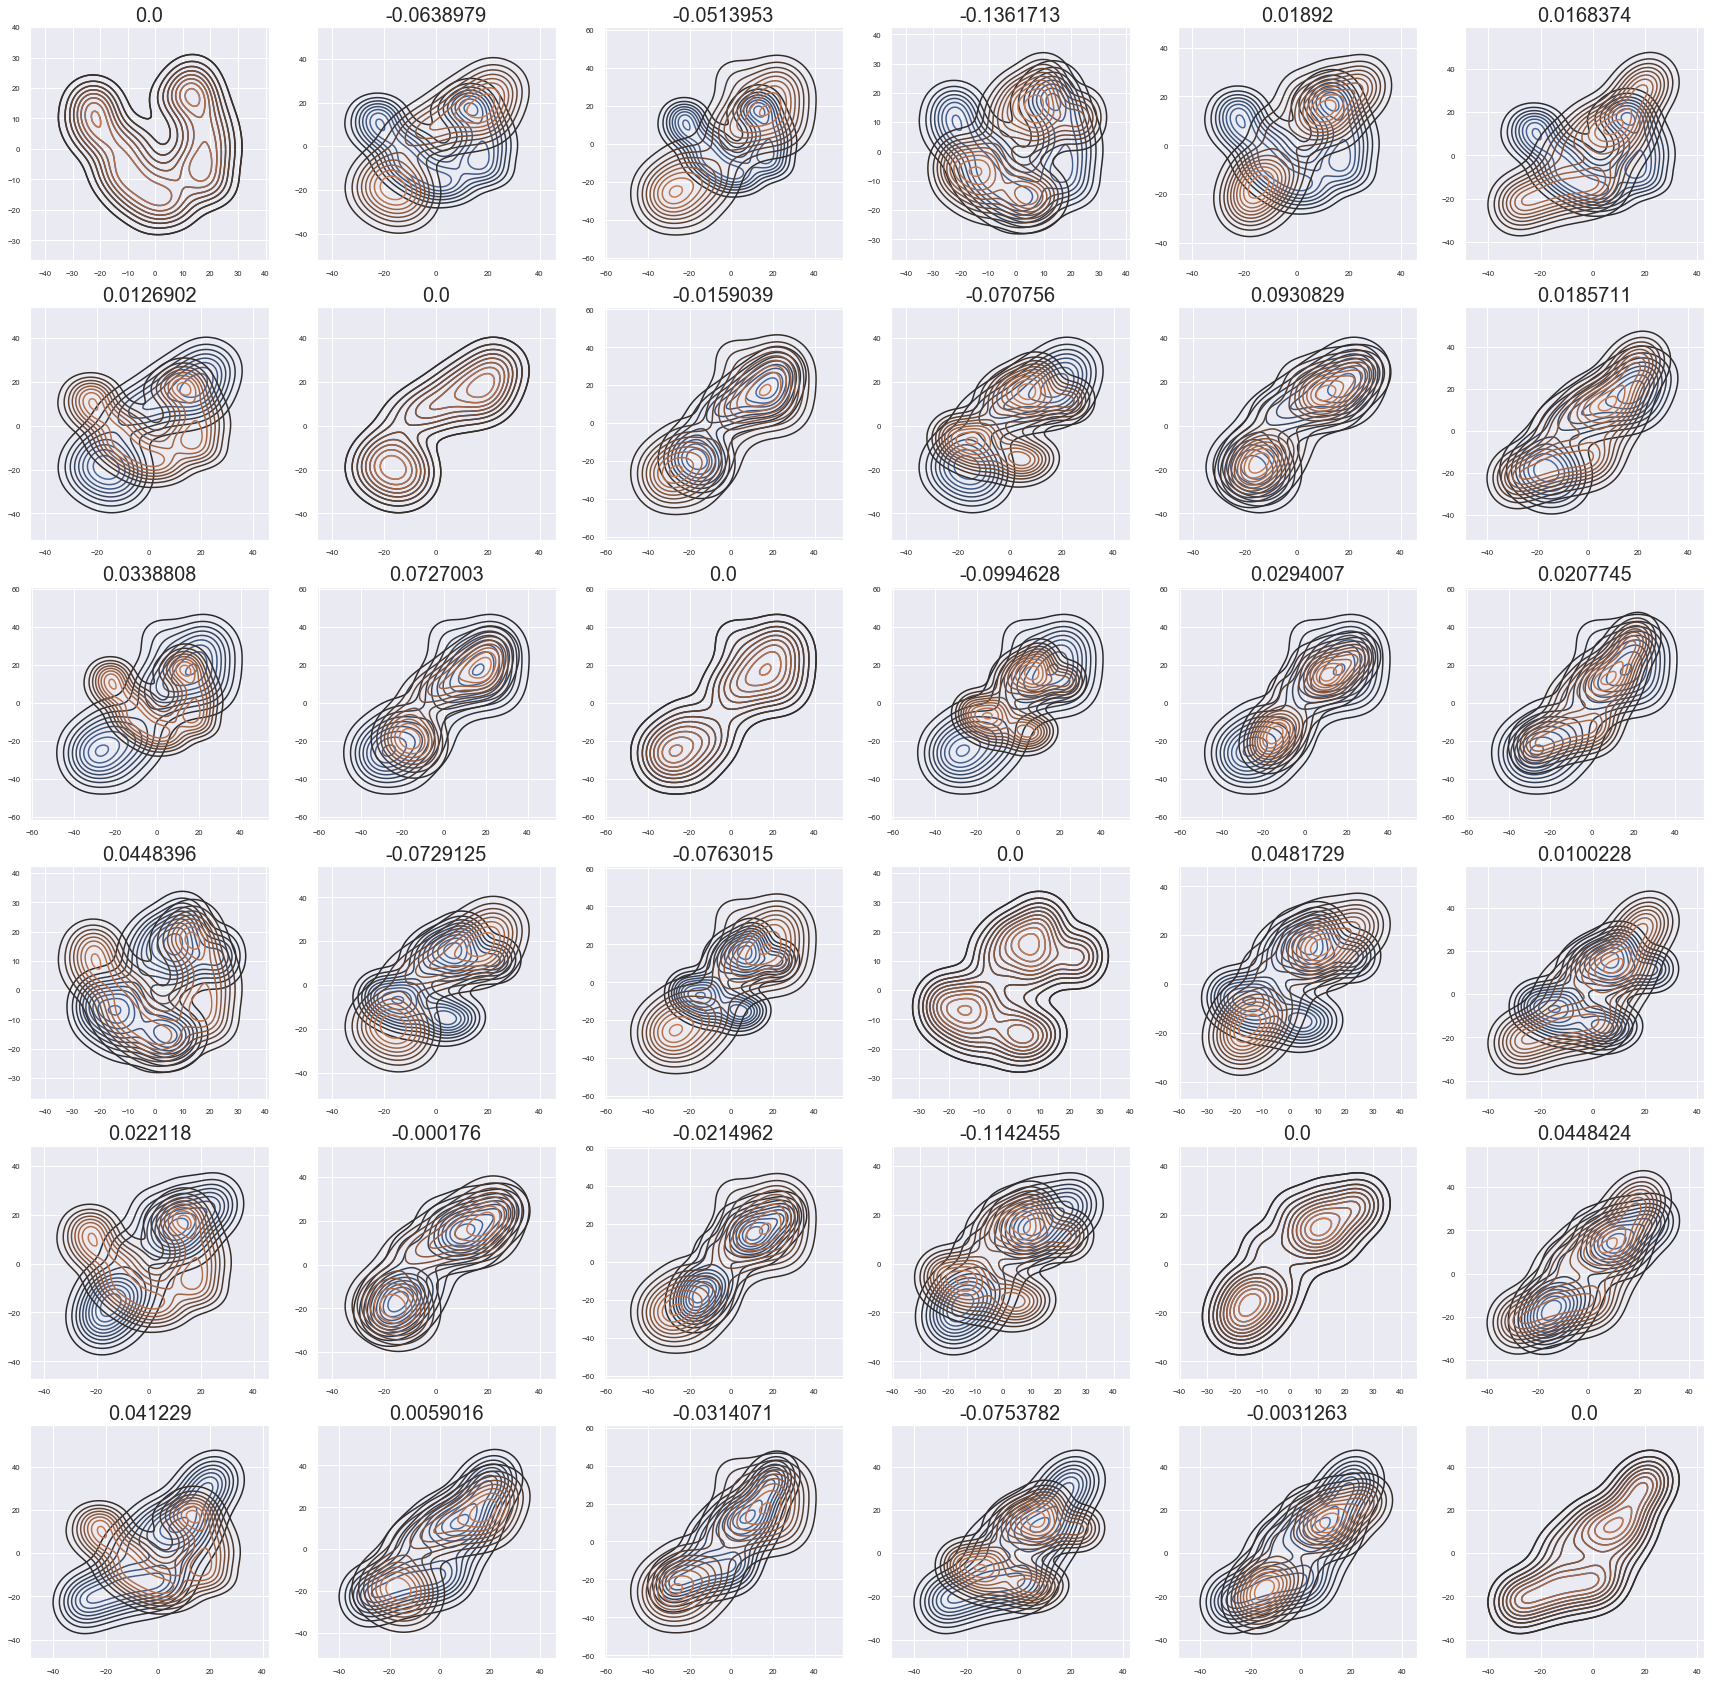

In [126]:
fig, ax =plt.subplots(6,6, figsize=(30, 30))

for i, tsne_result1 in enumerate(tsne_results):
    for j, tsne_result2 in enumerate(tsne_results):
        sns.kdeplot(tsne_result1[:,0], tsne_result1[:,1], shade=False, shade_lowest=False, ax=ax[i,j]).set_title(transferability[j][i],fontsize=20)
        sns.kdeplot(tsne_result2[:,0], tsne_result2[:,1], shade=False, shade_lowest=False, ax=ax[i,j])
fig.show()


In [142]:
tsne_r = pd.DataFrame(tsne_results[1])
import scipy

ary = scipy.spatial.distance.cdist(pd.DataFrame(tsne_results[0]).iloc[:,1:], pd.DataFrame(tsne_results[1]).iloc[:,1:], metric='euclidean')

pd.DataFrame(ary)


0          1          2          3          4          5    \
0    12.363009  17.843434  18.300546  16.440377  18.833785  14.729476   
1     8.538239  14.018664  14.475776  12.615607  15.009015  10.904706   
2     4.680477  10.160902  10.618013   8.757845  11.151253   7.046944   
3    12.532831  18.013256  18.470367  16.610199  19.003607  14.899298   
4     8.265276  13.745701  14.202812  12.342644  14.736052  10.631742   
5    10.542085  16.022510  16.479621  14.619452  17.012860  12.908551   
6     9.944137  15.424562  15.881673  14.021504  16.414912  12.310603   
7    14.224398  19.704823  20.161934  18.301765  20.695173  16.590864   
8    17.194682  22.675107  23.132218  21.272050  23.665458  19.561149   
9    20.717984  26.198409  26.655520  24.795352  27.188760  23.084451   
10   26.188801  31.669226  32.126337  30.266169  32.659577  28.555268   
11   29.606255  35.086680  35.543791  33.683623  36.077031  31.972722   
12   32.023692  37.504117  37.961228  36.101060  38.494468  34.390159   
13   34.863636  40.344061  40.801172  38.941004  41.334412  37.230103   
14   18.536304  24.016729  24.473841  22.613672  25.007080  20.902771   
15   45.260721  50.741146  51.198257  49.338089  51.731497  47.627188   
16   19.965776  25.446201  25.903312  24.043144  26.436552  22.332242   
17   37.482924  42.963349  43.420461  41.560292  43.953700  39.849391   
18   15.669909  21.150333  21.607445  19.747276  22.140684  18.036375   
19   39.111723  44.592148  45.049259  43.189091  45.582499  41.478189   
20   32.746065  38.226490  38.683601  36.823433  39.216841  35.112532   
21   32.260550  37.740975  38.198087  36.337918  38.731326  34.627017   
22   33.793400  39.273825  39.730936  37.870768  40.264175  36.159866   
23   29.489920  34.970345  35.427456  33.567288  35.960696  31.856387   
24   27.374418  32.854843  33.311954  31.451786  33.845193  29.740884   
25   25.903745  31.384170  31.841281  29.981113  32.374521  28.270212   
26   34.545566  40.025990  40.483102  38.622933  41.016341  36.912032   
27   27.617924  33.098349  33.555460  31.695292  34.088699  29.984390   
28   32.371084  37.851509  38.308620  36.448452  38.841860  34.737551   
29   36.773250  42.253675  42.710786  40.850617  43.244025  39.139716   
..         ...        ...        ...        ...        ...        ...   
178  31.516206  36.996631  37.453742  35.593574  37.986981  33.882672   
179  33.382601  38.863026  39.320137  37.459969  39.853376  35.749067   
180  27.270610  32.751035  33.208146  31.347978  33.741385  29.637076   
181  35.365181  40.845606  41.302717  39.442549  41.835957  37.731647   
182  35.757394  41.237819  41.694930  39.834762  42.228169  38.123860   
183  32.519490  37.999915  38.457026  36.596858  38.990266  34.885957   
184  35.315332  40.795757  41.252869  39.392700  41.786108  37.681799   
185  36.389538  41.869963  42.327074  40.466906  42.860313  38.756004   
186  36.943358  42.423783  42.880895  41.020726  43.414134  39.309825   
187  36.367713  41.848138  42.305249  40.445081  42.838489  38.734179   
188  38.182843  43.663268  44.120379  42.260211  44.653619  40.549310   
189  34.108821  39.589246  40.046357  38.186189  40.579597  36.475287   
190  21.827100  27.307525  27.764636  25.904468  28.297876  24.193567   
191  36.250970  41.731395  42.188506  40.328338  42.721745  38.617436   
192  23.335138  28.815562  29.272674  27.412505  29.805913  25.701604   
193  26.654561  32.134986  32.592097  30.731929  33.125336  29.021027   
194  28.581789  34.062214  34.519326  32.659157  35.052565  30.948256   
195  19.081073  24.561498  25.018610  23.158441  25.551849  21.447540   
196  26.058511  31.538936  31.996047  30.135879  32.529287  28.424978   
197  30.759813  36.240238  36.697349  34.837181  37.230588  33.126279   
198  23.930893  29.411318  29.868429  28.008260  30.401668  26.297359   
199  18.665579  24.146004  24.603115  22.742947  25.136354  21.032045   
200   0.347260   5.827684   6.284796   4.424627   6.818035   2.713726

# MDS
## Calculate MDS for data sets

In [127]:
mds_results = []
for branch in branches:
    embedding = MDS(n_components=2, verbose=1)
    mds_results.append(embedding.fit_transform(branch))

breaking at iteration 209 with stress 1992833206.7736676
breaking at iteration 279 with stress 1993135952.311879
breaking at iteration 208 with stress 2002479586.1799488
breaking at iteration 267 with stress 379641290.6250318


## Visualize MDS for data sets

/Users/robinhirt/anaconda3/envs/tl/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


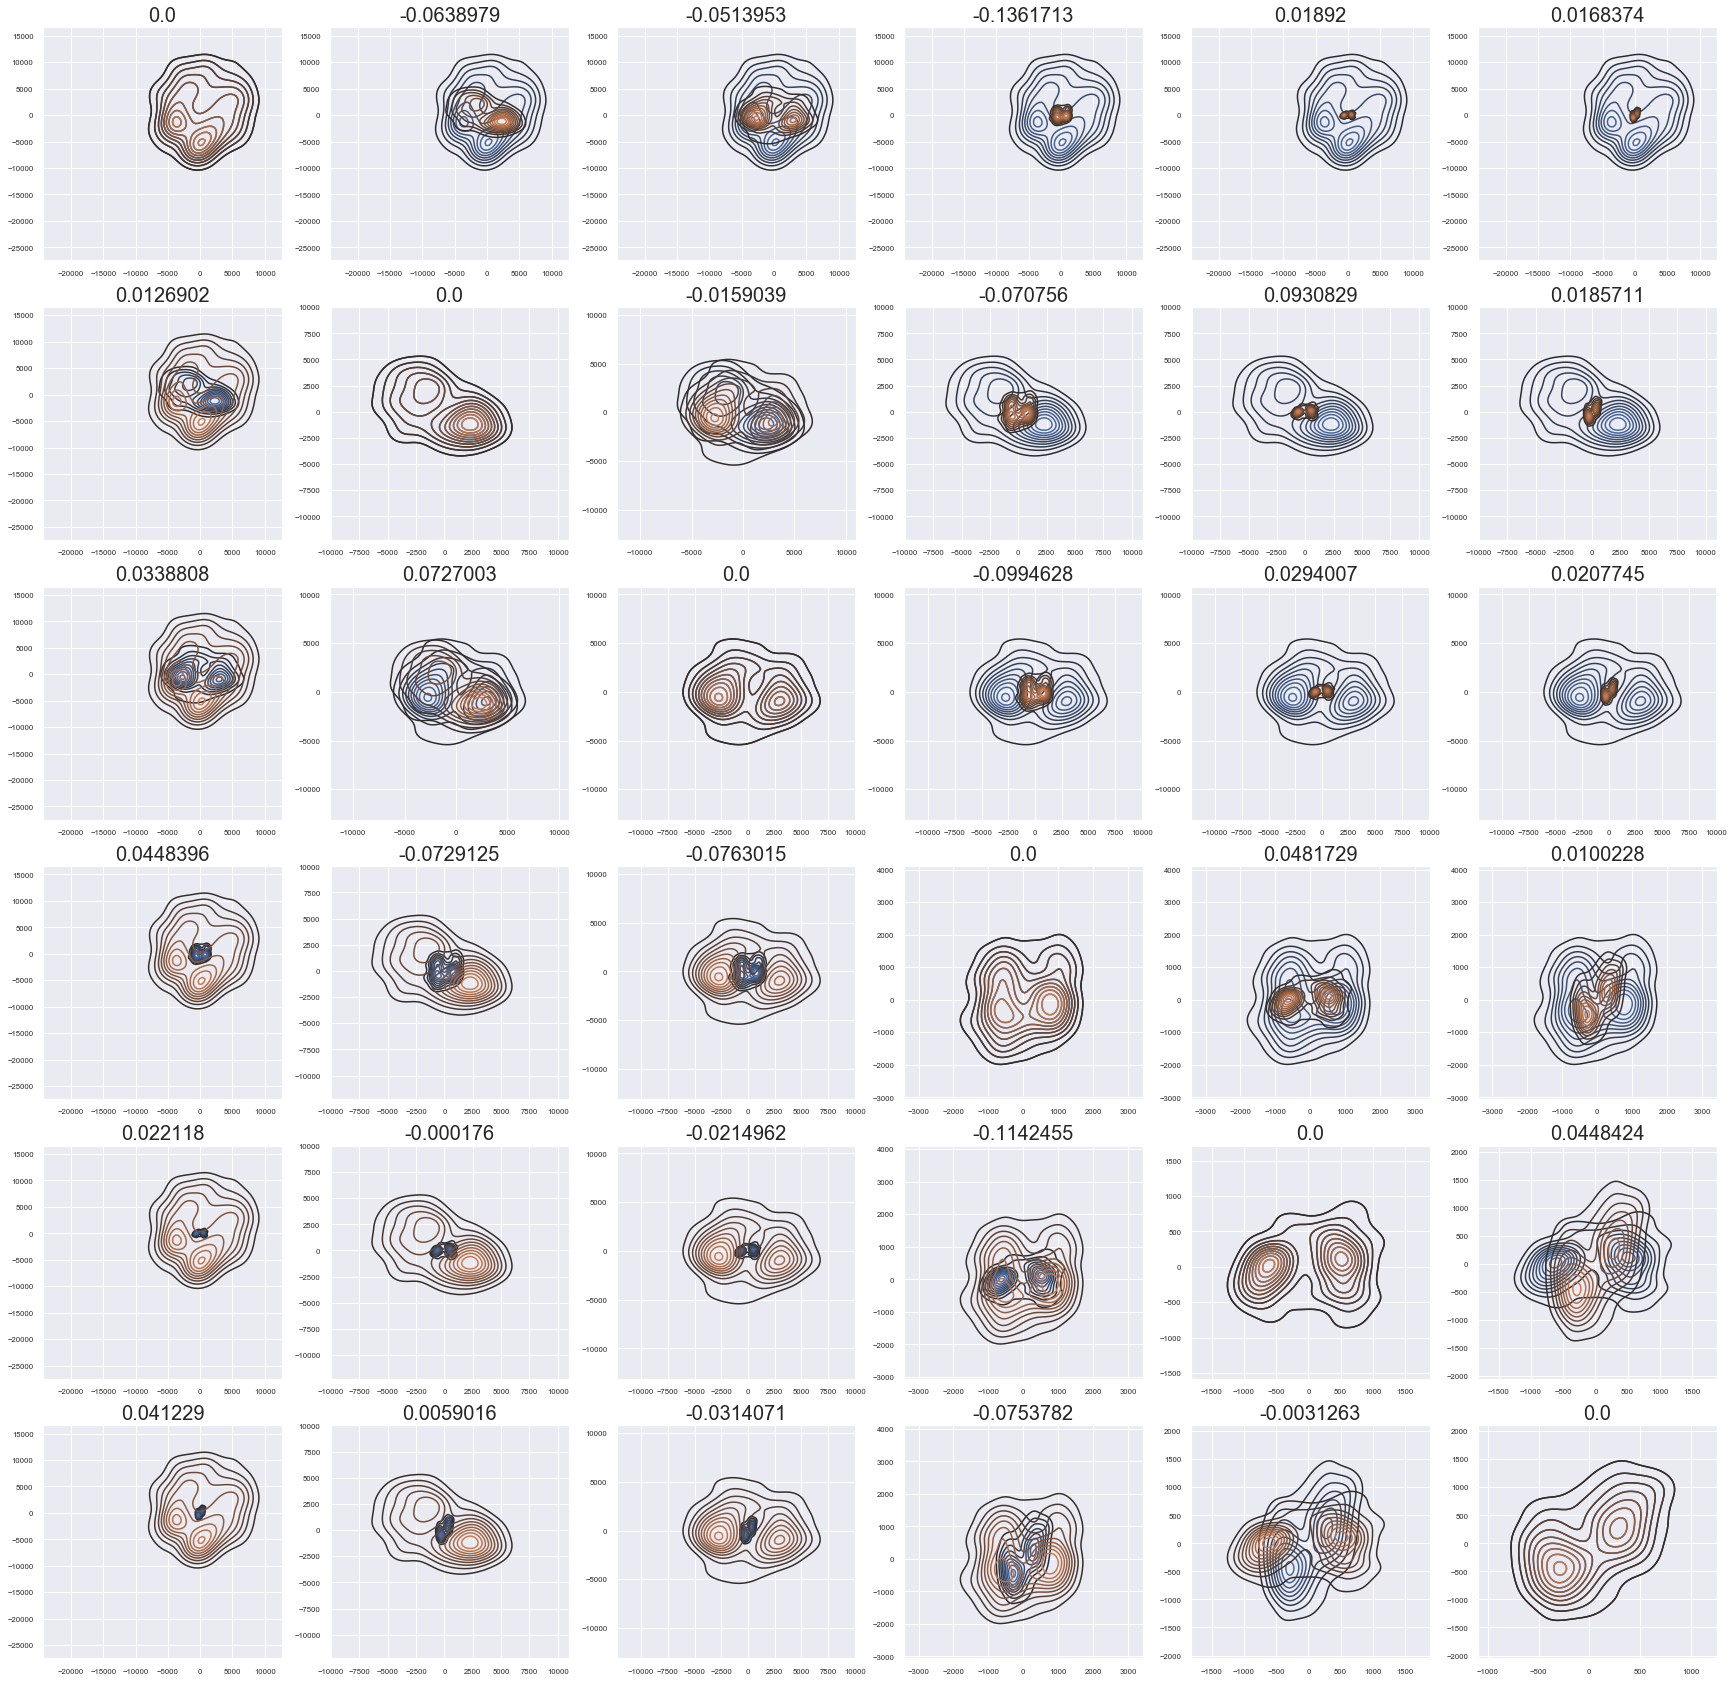

In [128]:
fig, ax =plt.subplots(6,6, figsize=(30, 30))

for i, mds_result1 in enumerate(mds_results):
    for j, mds_result2 in enumerate(mds_results):
        sns.kdeplot(mds_result1[:,0], mds_result1[:,1], shade=False, shade_lowest=False, ax=ax[i,j]).set_title(transferability[j][i],fontsize=20)
        sns.kdeplot(mds_result2[:,0], mds_result2[:,1], shade=False, shade_lowest=False, ax=ax[i,j])
fig.show()


# PCA
## calculate PCA

In [129]:
pca_results = []
for branch in branches:
    embedding = PCA(n_components=2)
    pca_results.append(embedding.fit_transform(branch))

## Visualize PCA for data sets

/Users/robinhirt/anaconda3/envs/tl/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


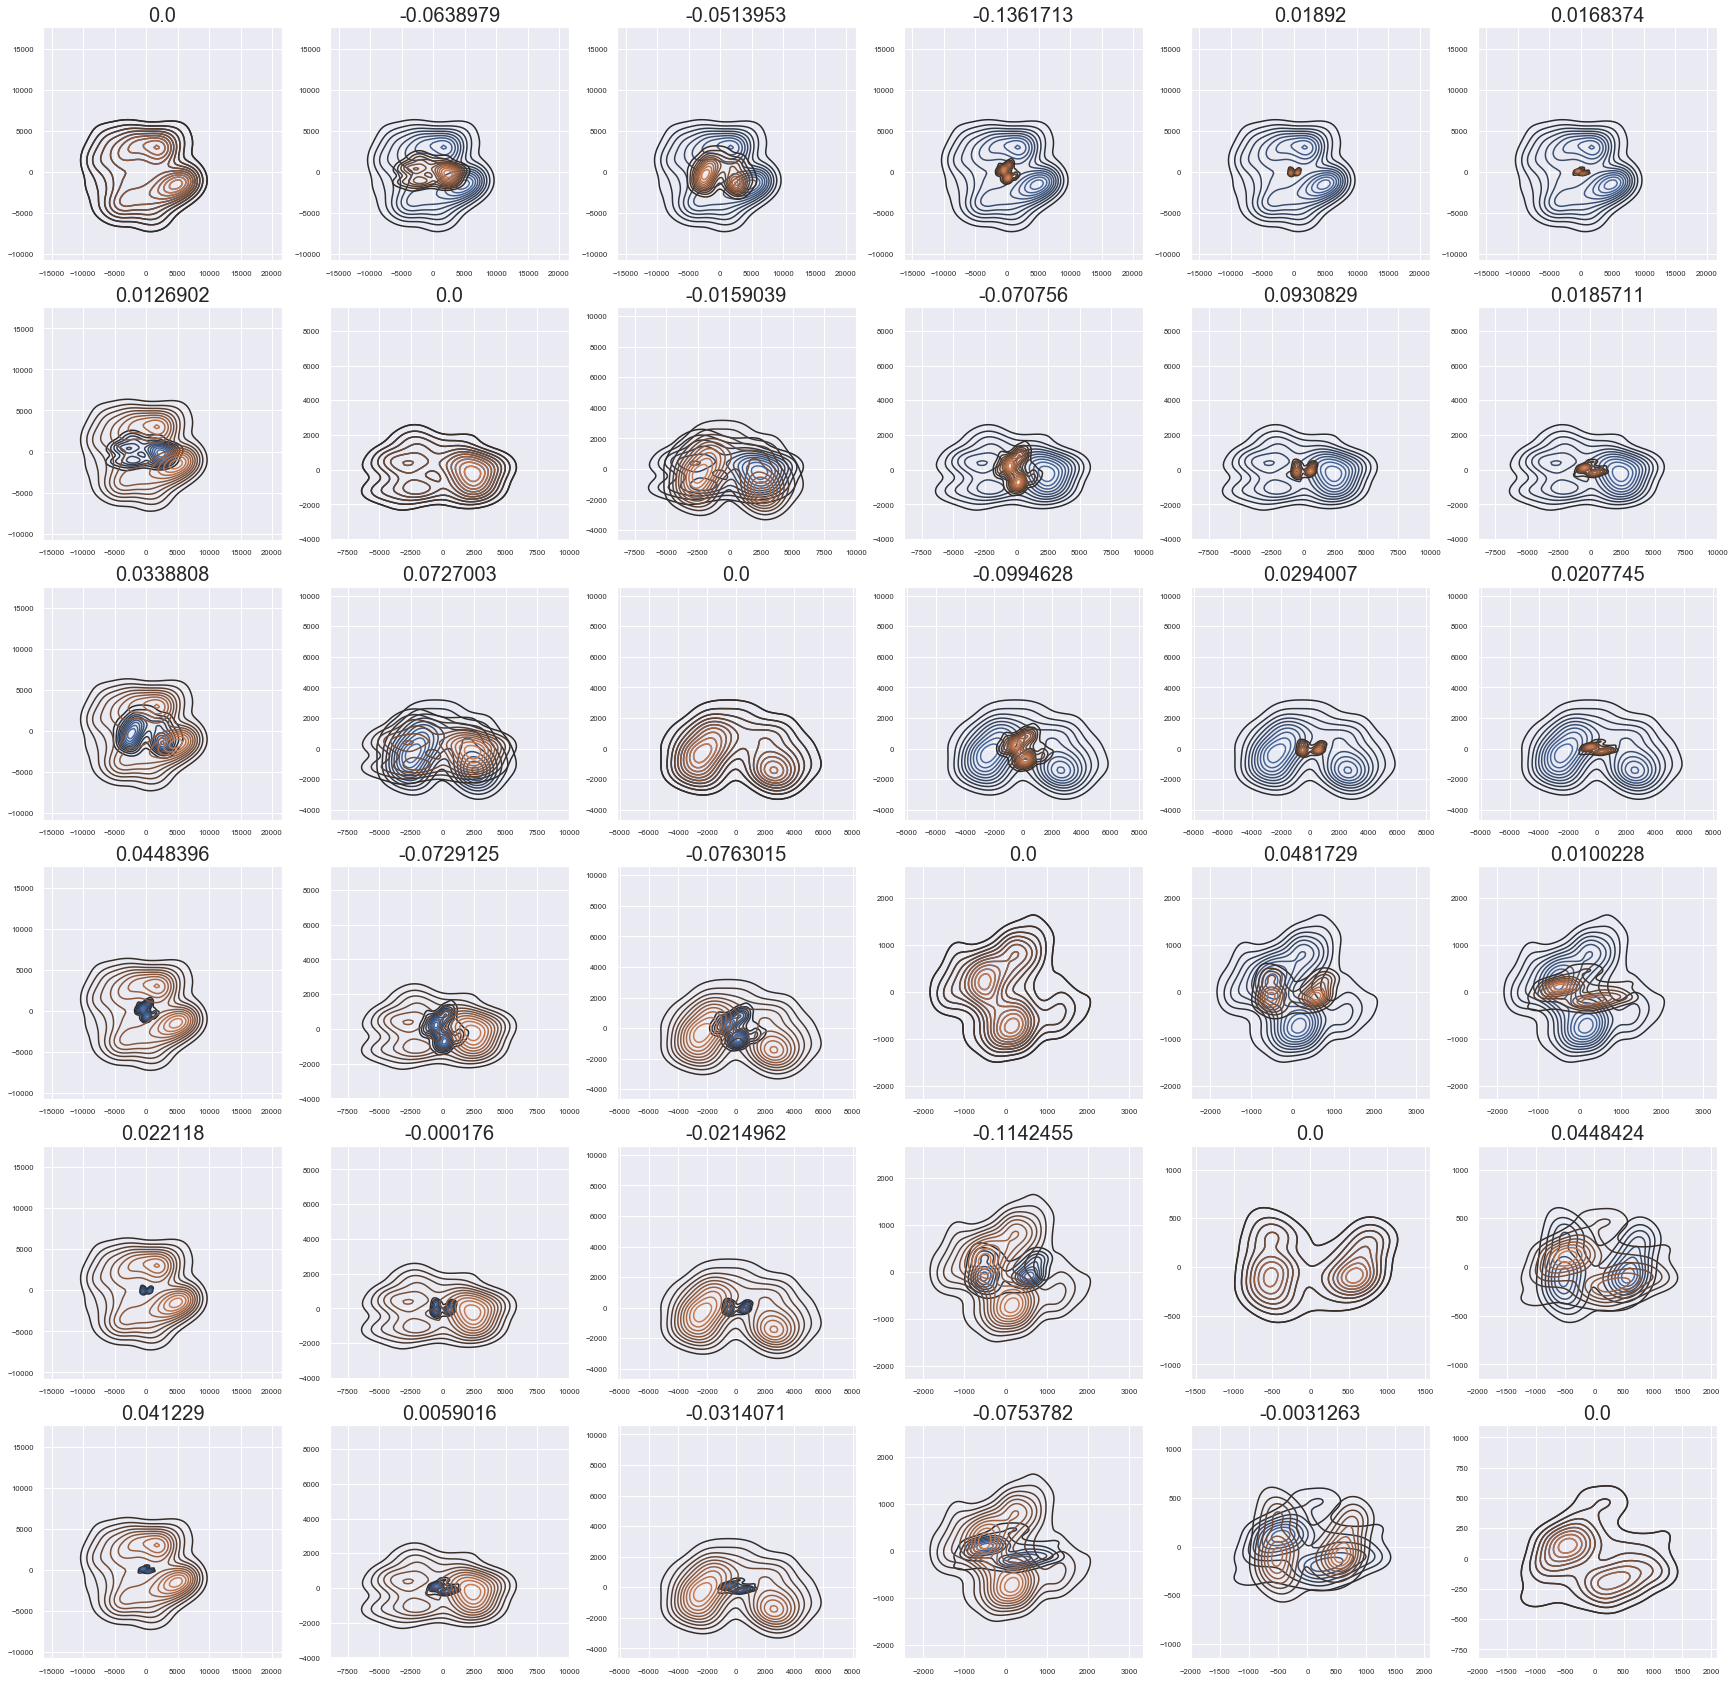

In [130]:
fig, ax =plt.subplots(6,6, figsize=(30, 30))

for i, pca_result1 in enumerate(pca_results):
    for j, pca_result2 in enumerate(pca_results):
        sns.kdeplot(pca_result1[:,0], pca_result1[:,1], shade=False, shade_lowest=False, ax=ax[i,j]).set_title(transferability[j][i],fontsize=20)
        sns.kdeplot(pca_result2[:,0], pca_result2[:,1], shade=False, shade_lowest=False, ax=ax[i,j])
fig.show()